# Parte 2: Redução de dimensionalidade

Considere o conjunto de dados MNIST utilizado na Atividade 6. Realize a redução de dimensionalidade dos dados com o algoritmo PCA. Escolha um algoritmo de classificação e aplique ele, comparando os resultados com e sem a redução de dimensionalidade. A quantidade de dimensões utilizadas é de sua escolha. Discuta o resultado.

Extra: faça o plot de imagens do dataset após a redução de dimensionalidade.

In [25]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from time import time
#loading
#loading
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
image_size = X_train.shape[1]
input_size = image_size*image_size
X_test = np.reshape(X_test,[-1,input_size])
X_train = np.reshape(X_train,[-1,input_size])

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Normalizando os dados de treino e validação
X_train_norm = scaler.fit_transform(X_train) 
X_test_norm = scaler.transform(X_test) 
X_train_norm.shape

(60000, 784)

### Modelo Escolhido: Support Vector Machine(SVM)
Aplicando o modelo antes de fazer a redução de dimensionalidade.

In [4]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_norm, y_train)

SVC()

In [5]:
y_pred = model.predict(X_test_norm)

In [6]:
from sklearn import metrics
# Acurácia individualmente
metrics.accuracy_score(y_test,y_pred) 

0.9791

### Aplicando a redução de dimensionalidade através do PCA

In [7]:
from sklearn.decomposition import PCA
# Usando componentes que retenham 96% de variação do dataset original
pca = PCA(0.96)
X_train_pca = pca.fit_transform(X_train_norm)
X_train_pca.shape

(60000, 180)

In [8]:
pca.explained_variance_ratio_

array([0.09704292, 0.07095652, 0.06168852, 0.05389213, 0.0486861 ,
       0.04312066, 0.03271805, 0.02883785, 0.02761924, 0.0235691 ,
       0.02109109, 0.02022914, 0.01715753, 0.01692047, 0.01578581,
       0.01482896, 0.0132451 , 0.01276849, 0.01187218, 0.0115264 ,
       0.01066125, 0.01006675, 0.00953537, 0.00912509, 0.00883371,
       0.00839287, 0.00812548, 0.00786336, 0.00744705, 0.00690833,
       0.00658069, 0.00648123, 0.00602592, 0.0058656 , 0.0057    ,
       0.00543607, 0.00505767, 0.0048784 , 0.00481411, 0.00472248,
       0.0045673 , 0.00444819, 0.00418485, 0.003982  , 0.0038496 ,
       0.00375089, 0.00361995, 0.00351578, 0.00340045, 0.00321862,
       0.00319005, 0.00312793, 0.00295971, 0.00288944, 0.0028412 ,
       0.00271426, 0.00269511, 0.00258463, 0.00253761, 0.00244772,
       0.00240497, 0.00239254, 0.002304  , 0.00221524, 0.00213713,
       0.00207217, 0.00203035, 0.00196775, 0.00192845, 0.00188625,
       0.0018697 , 0.00181076, 0.00177555, 0.00174892, 0.00165

In [9]:
pca.n_components_

180

In [10]:
X_test_pca = pca.transform(X_test_norm)

In [11]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_pca, y_train)

SVC()

In [12]:
y_pred_pca = model.predict(X_test_pca)

In [13]:
metrics.accuracy_score(y_test,y_pred_pca) 

0.983

### Fazendo a redução para 2 componentes

In [14]:
pca2 = PCA(n_components=2)
X_train_pca2 = pca2.fit_transform(X_train_norm)
X_train_pca2.shape

(60000, 2)

In [15]:
pca2.explained_variance_ratio_

array([0.09704292, 0.07095652])

In [16]:
X_train_pca2

array([[ 0.48599014, -1.2258935 ],
       [ 3.96752074, -1.1563084 ],
       [-0.20335023,  1.53806792],
       ...,
       [-0.69826244,  0.62791039],
       [ 0.51216831, -0.0218783 ],
       [-0.68016489, -0.09682428]])

In [17]:
X_test_pca2 = pca2.transform(X_test_norm)

In [18]:
model = SVC()
model.fit(X_train_pca2, y_train)

SVC()

In [19]:
y_pred_pca2 = model.predict(X_test_pca2)

In [20]:
metrics.accuracy_score(y_test,y_pred_pca2) 

0.478

In [33]:
stacking = np.vstack((X_train_pca2.T , y_train)).T
dataframe = pd.DataFrame(data=stacking , columns=("1st component", "2nd Component" , "Labels"))

dataframe.head(5)

,1st component,2nd Component,Labels
0,0.485990,-1.225893,5.0
1,3.967521,-1.156308,0.0
2,-0.203350,1.538068,4.0
3,-3.133827,-2.381146,1.0
4,-1.500979,2.864629,9.0


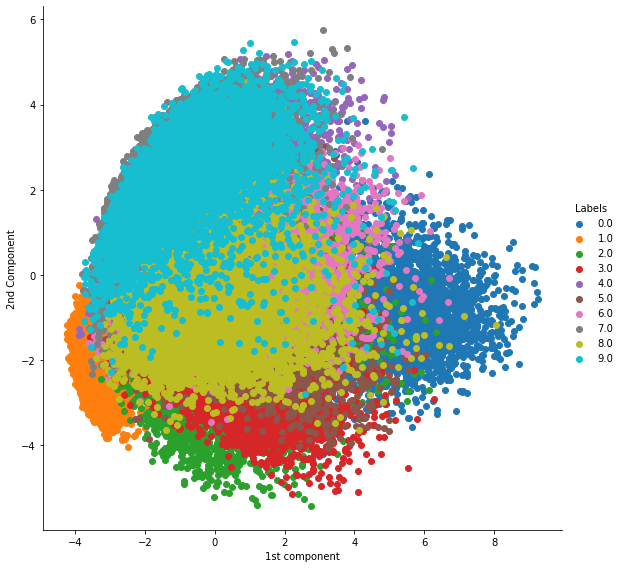

In [34]:
sns.FacetGrid(dataframe , hue='Labels', height=8).map(plt.scatter, '1st component' , '2nd Component').add_legend()
plt.show()

### Analisandos os resultados
Usando componentes que retenham uma variação de 96% do original, percebemos que o modelo apresenta menor tempo de resposta de execução e até uma maior acurácia. Pode-se deduzir que a redução da dimensionalidade, deixou as imagens mais compactas sem perder nenhum tipo de informação importante desses recursos que são as imagens.

Ressalta-se que ao tentar usar somente duas componentes o modelo apresenta bem menos eficiência, isso pelo fato de que com somente duas componenentes não há uma grande retenção de informação dos recursos, ou seja, das imagens.